In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import statsmodels.api as sm

sns.set()

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\__init__.py)

# Problem Statement
The goal of this data science project is to help a real estate agency provide guidance to homeowners who want to buy or sell homes. One of the challenges that homeowners face is deciding whether to invest in home renovations and how much they can expect to gain from them. The project aims to address this challenge by developing a model that can estimate the value of a home based on its features and suggest the most profitable renovations for each home.

# Data Understanding
In this section of the data science project, we will explore and gain a comprehensive understanding of the dataset. Understanding the data is crucial before proceeding with any analysis or modeling tasks. Let's examine the columns and their descriptions to familiarize ourselves with the dataset:

1. id: Unique identifier for each house.

2. date: Date when the house was sold.

3. price: Sale price of the house (prediction target variable).

4. bedrooms: Number of bedrooms in the house.

5. bathrooms: Number of bathrooms in the house.

6. sqft_living: Square footage of living space in the home.

7. sqft_lot: Square footage of the lot.

8. floors: Number of floors (levels) in the house.

9. waterfront: Indicates whether the house is located on a waterfront. 

10. view: Quality of the view from the house.

11. condition: Overall condition of the house, related to the maintenance of the property. .

12. grade: Overall grade of the house, related to the construction and design of the property. 

13. sqft_above: Square footage of the house apart from the basement.

14. sqft_basement: Square footage of the basement in the house.

15. yr_built: Year when the house was built.

16. yr_renovated: Year when the house was last renovated.

17. zipcode: ZIP Code used by the United States Postal Service.

18. lat: Latitude coordinate of the house.

19. long: Longitude coordinate of the house.

20. sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors.

21. sqft_lot15: The square footage of the land lots of the nearest 15 neighbors.

By understanding the dataset's columns and their descriptions, we can make initial observations and formulate questions for further analysis. This step helps us gain insights into the data's nature, identify potential relationships, and plan subsequent steps for data preparation, exploration, and modeling.

In [144]:
df = pd.read_csv("data/raw/kc_house_data.csv")

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Data Cleaning

## Handling missing values
### Columns with missing values:
- waterfront - Change null to "not provided"
- view - Change null to "not provided"<br><br>
The above approach ensures that the missingness is preserved and can be taken into account during analysis.
<br><br>
- yr_renovated - Assuming the null values as well as values that are 0 mean the house has not been renovated
- zipcode
- sqft_basement - Assuming that missing values ('?') means no basement. Replce '?' with 0

In [146]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,NaN,NO,NO,NO,NO
view,NONE,NONE,NONE,NONE,NONE


In [147]:
df['waterfront'].value_counts(dropna=False)

NO     19075
NaN     2376
YES      146
Name: waterfront, dtype: int64

In [148]:
df['view'].value_counts(dropna=False)

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
NaN             63
Name: view, dtype: int64

In [149]:
columns = ["view", "waterfront"]
for column in columns:
    df[column].fillna("not provided", inplace=True)

In [150]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   view        21597 non-null  object
 1   waterfront  21597 non-null  object
dtypes: object(2)
memory usage: 337.6+ KB


In [151]:
df["yr_renovated"].replace(0, np.nan, inplace=True) # replace 0 with NaN  
df["yr_renovated"].fillna("not renovated", inplace=True) # fillna with "not renovated"

In [152]:
df["sqft_basement"].replace('?', 0, inplace = True) # replace '?' with 0
df = df.astype({'sqft_basement': float}) # change from object to float
df['sqft_basement'].dtype # confirm changes

dtype('float64')

# EDA

## Univariante analysis
### Findings:
- A majority of our numeric variables as skewed to the right
- A mjority of our numeric variables have ouliers
    - We'll need to address this before adding them to our model
- A majority of our categorical variables are imbalanced.

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,285.716581,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,439.819830,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Visulizing distribuition of numerc variables

In [139]:
# list for the continous numeric variables
cont_cols = ["sqft_basement", "sqft_living", "sqft_lot", "sqft_above", "sqft_living15", "sqft_lot15"]

# list for the discrete numeric variables
dic_cols = ['bedrooms', 'bathrooms', 'floors']

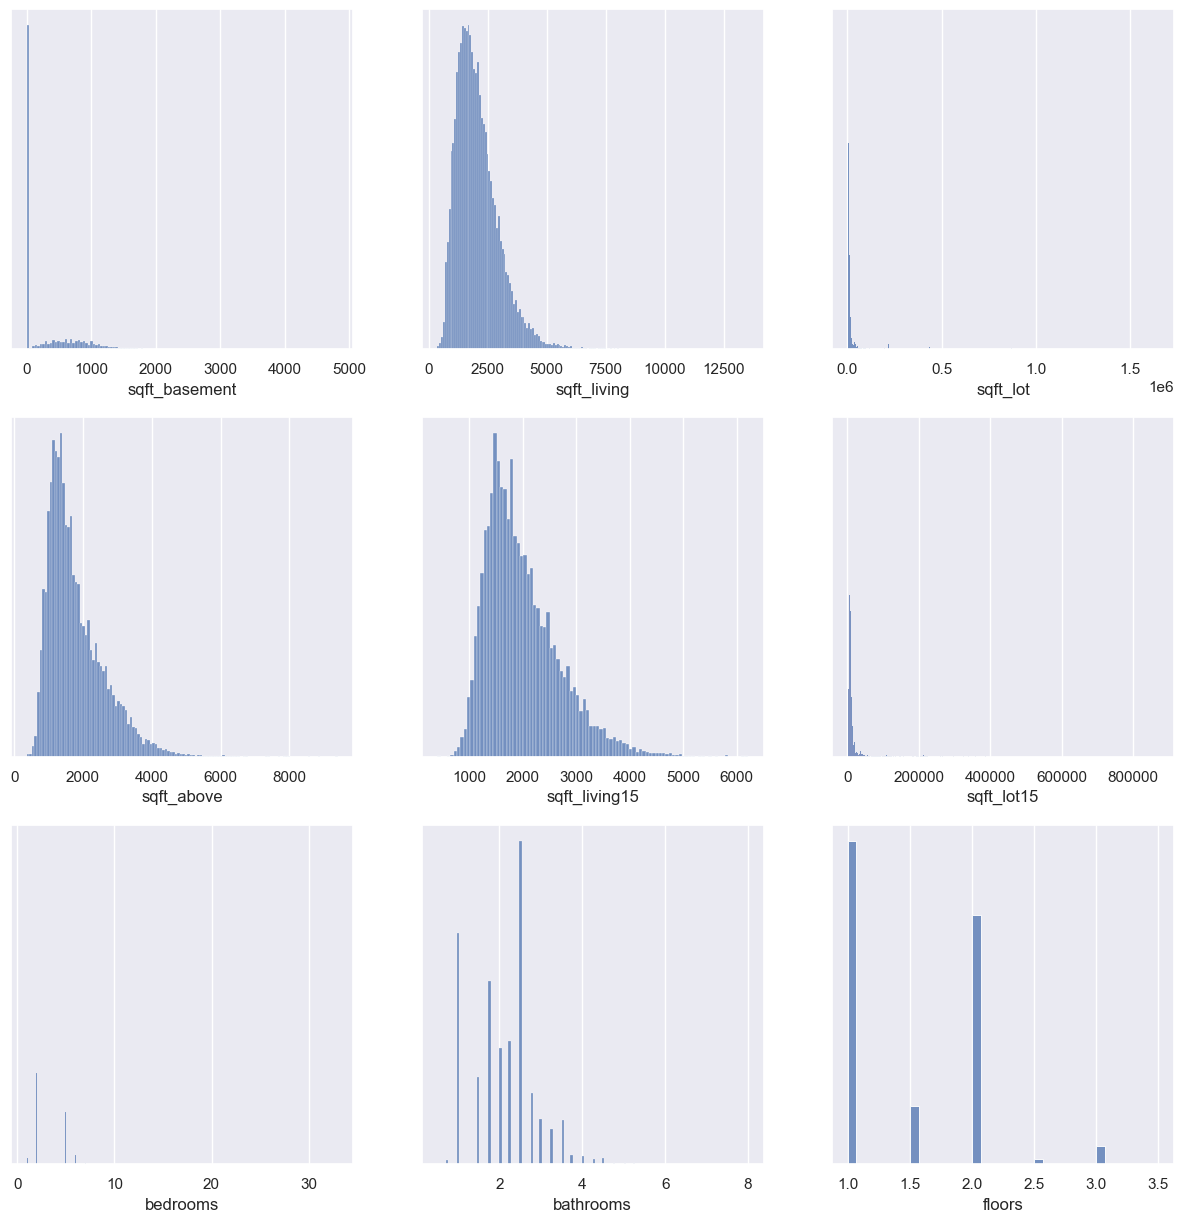

In [92]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

axs = [item for sublist in axs for item in sublist]

for idx, cont_col in enumerate(cont_cols+dic_cols):
    sns.histplot(data=df, x=cont_col, ax=axs[idx])
    axs[idx].axes.get_yaxis().set_visible(False) # turning of y axis
    

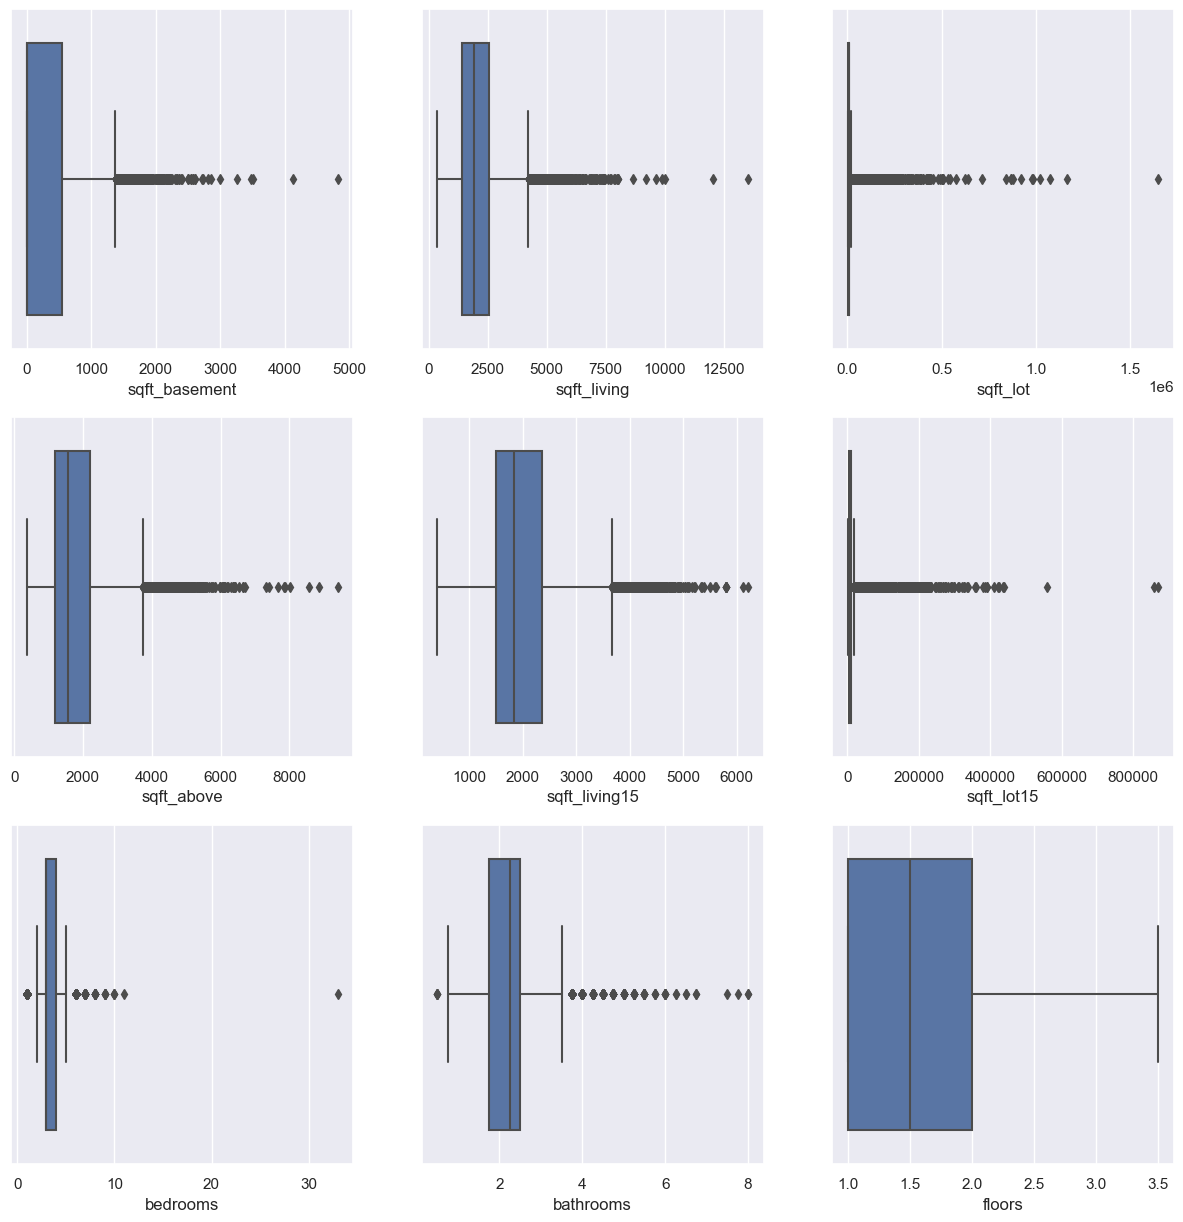

In [157]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

axs = [item for sublist in axs for item in sublist]

for idx, cont_col in enumerate(cont_cols+dic_cols):
    sns.boxplot(x=df[cont_col], ax=axs[idx])
    axs[idx].axes.get_yaxis().set_visible(False) # turning of y axis

### Visulizing distribution of categorical features

In [13]:
# list of categorical variables
cat_cols = ['grade', 'view', 'condition', 'waterfront']

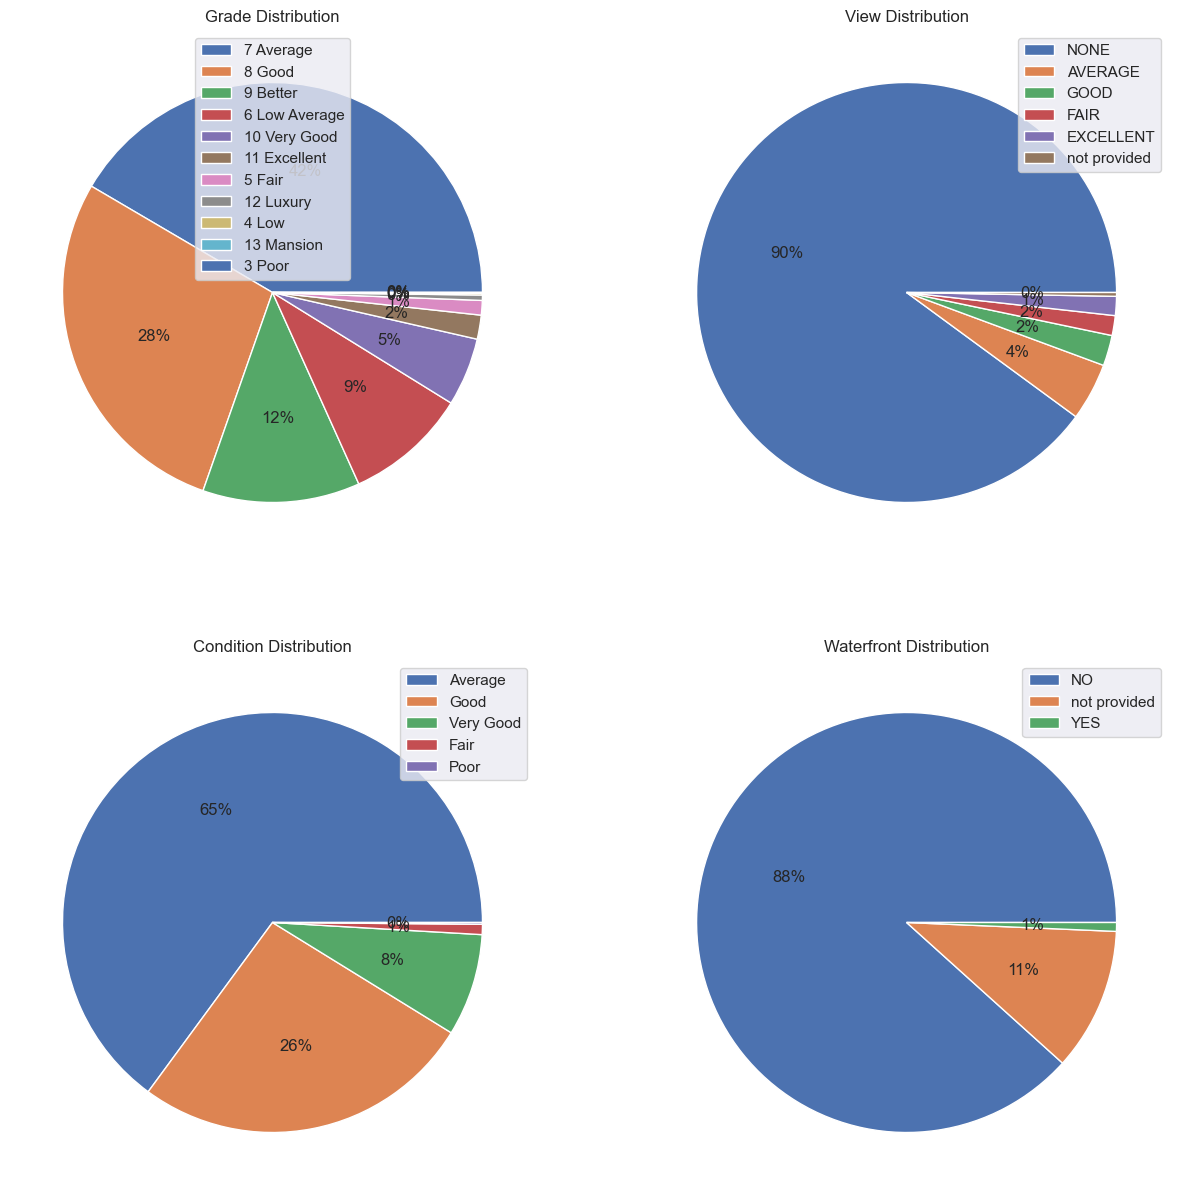

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

axs = [item for sublist in axs for item in sublist]

for idx, cat_col in enumerate(cat_cols):
    # define data
    data = df[cat_col].value_counts().values
    labels = df[cat_col].value_counts().index
    
    # create pie chart
    axs[idx].pie(data, autopct='%.0f%%')
    # set title
    axs[idx].set_title(f"{cat_col.title()} Distribution")
    # create legend
    axs[idx].legend(labels)

## Bivariate analysis
In this section well be looking at how our independent variables are related to the dependent variable (price)

### Findings:
- All numeric variables have a postive correlation with price
- Most correlated are sqft_living, sqft_above, sqrt_living15, and bathrooms
- Bedrooms and floors have a medium positive correlation.
- Those 6 variables will be useful when creating our model.
- Since the p-value is less than 0.05 for all the One-Way Anova tests conducted on the categorical feature, we can reject the null hypothesis. This implies that we have sufficient proff to say that their exists a difference in price amoung the different categories in each categorical variable.
- Location also seems to have an effect on price, with most of the expensive houses are clustered together.

### Numeric variables

In [15]:
# list of numeric columns
num_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15','sqft_lot15', 'bedrooms', 'bathrooms', 'floors']
corr = df[num_cols].corr()
corr

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors
price,1.000000,0.701917,0.089876,0.605368,0.321108,0.585241,0.082845,0.308787,0.525906,0.256804
sqft_living,0.701917,1.000000,0.173453,0.876448,0.428660,0.756402,0.184342,0.578212,0.755758,0.353953
sqft_lot,0.089876,0.173453,1.000000,0.184139,0.015031,0.144763,0.718204,0.032471,0.088373,-0.004814
sqft_above,0.605368,0.876448,0.184139,1.000000,-0.051175,0.731767,0.195077,0.479386,0.686668,0.523989
sqft_basement,0.321108,0.428660,0.015031,-0.051175,1.000000,0.199288,0.015885,0.297229,0.278485,-0.241866
sqft_living15,0.585241,0.756402,0.144763,0.731767,0.199288,1.000000,0.183515,0.393406,0.569884,0.280102
sqft_lot15,0.082845,0.184342,0.718204,0.195077,0.015885,0.183515,1.000000,0.030690,0.088303,-0.010722
bedrooms,0.308787,0.578212,0.032471,0.479386,0.297229,0.393406,0.030690,1.000000,0.514508,0.177944
bathrooms,0.525906,0.755758,0.088373,0.686668,0.278485,0.569884,0.088303,0.514508,1.000000,0.502582
floors,0.256804,0.353953,-0.004814,0.523989,-0.241866,0.280102,-0.010722,0.177944,0.502582,1.000000


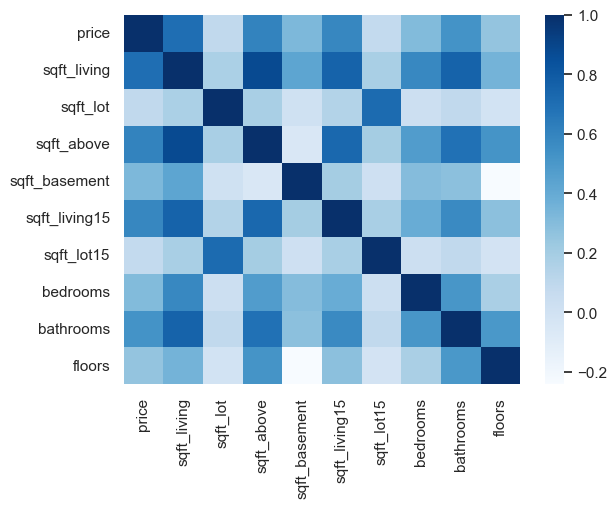

In [16]:
sns.heatmap(corr, cmap='Blues');

#### Continous numeric variables
Here we look at how our continous numeric variables are related to the price

In [17]:
# list of continous variables with a medium to high correlation to 
high_corr_cols = ["sqft_living", "sqft_above", "sqft_living15", 'bathrooms']

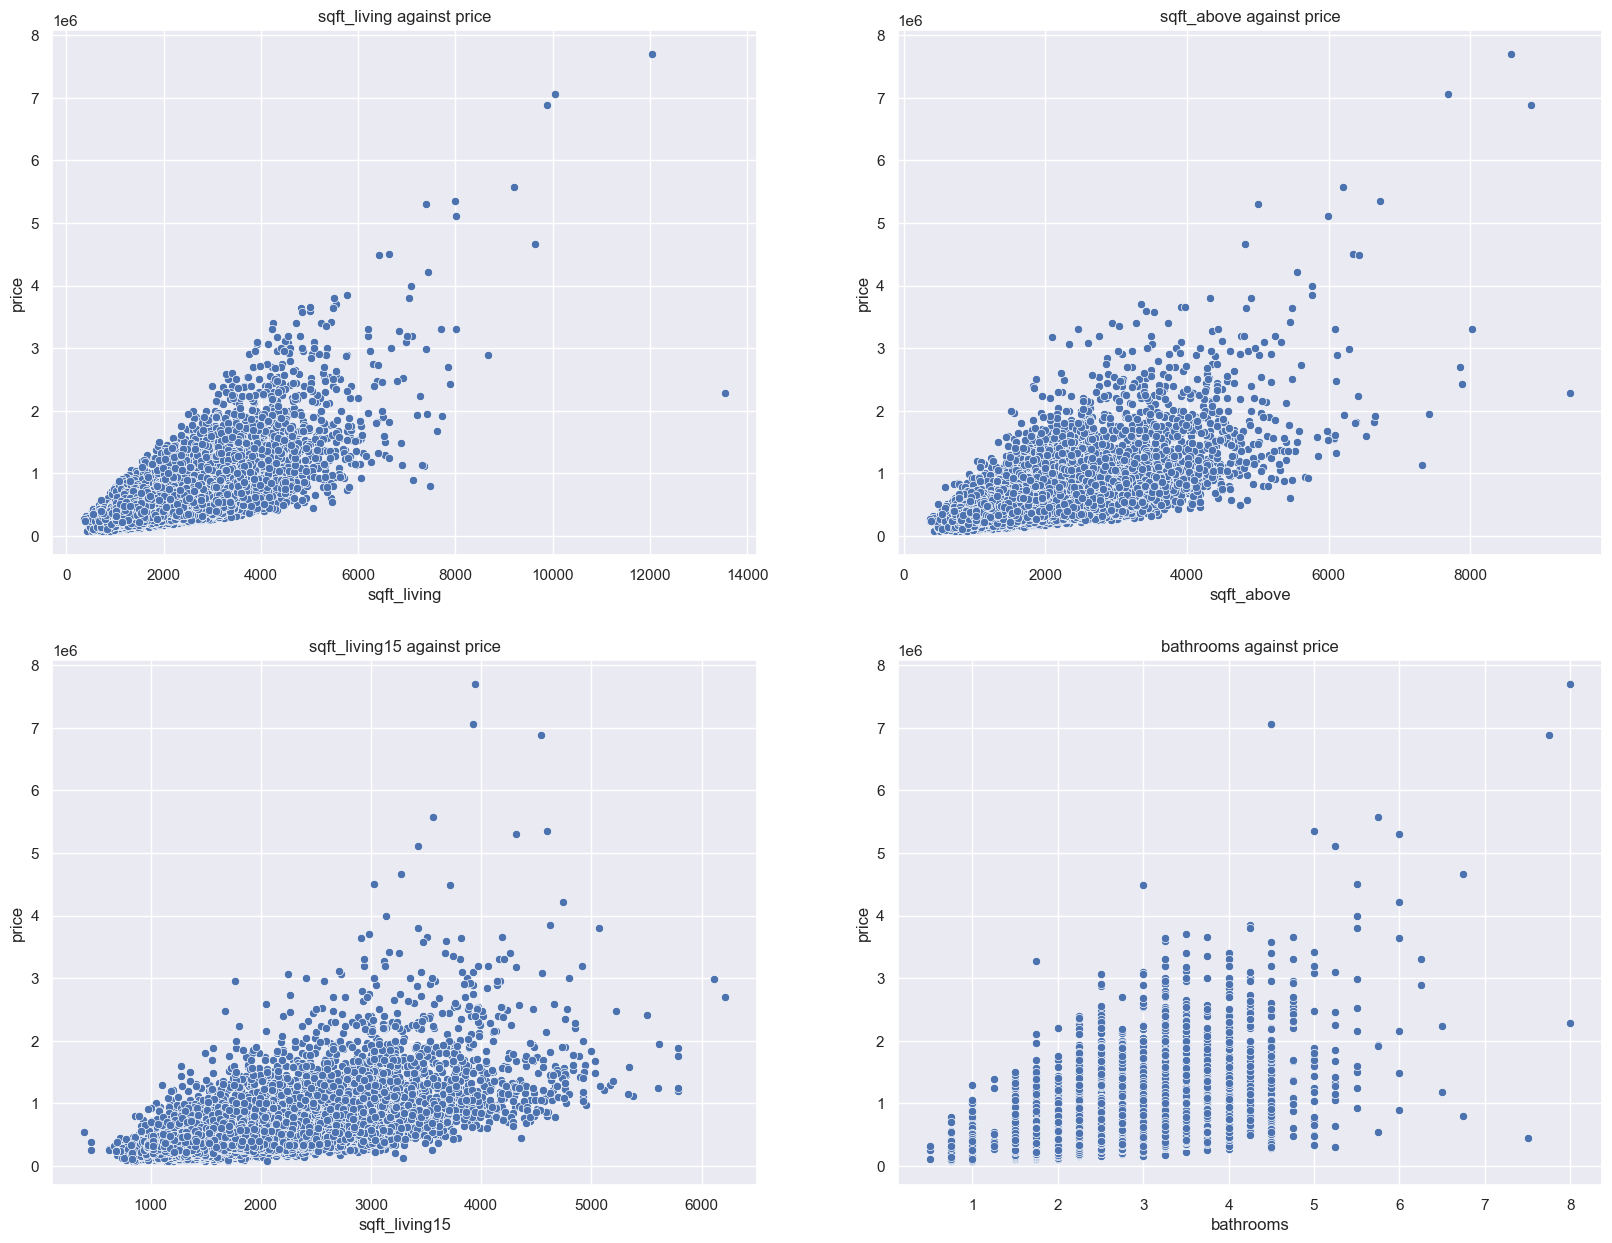

In [18]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))

axs = [item for sublist in axs for item in sublist]

for idx, _ in enumerate(high_corr_cols):
    sns.scatterplot(x=_, y='price', data=df, ax=axs[idx])
    axs[idx].set_title(f"{_} against price")

### Discrete numeric variables

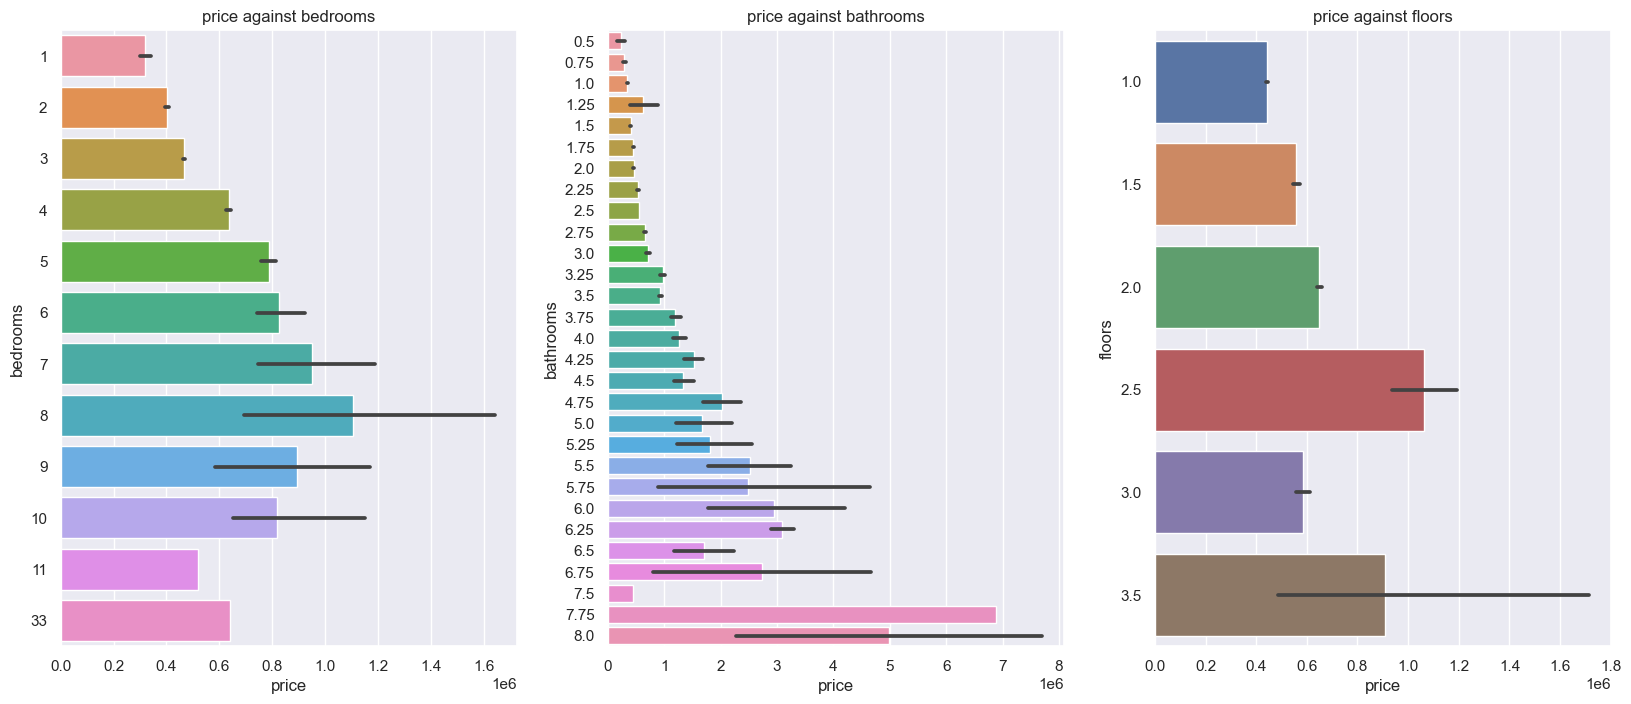

In [22]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 8))

for idx, _ in enumerate(dic_cols):
    sns.barplot(x="price", y=_, data=df, ax=axs[idx], orient="h")
    axs[idx].set_title(f"price against {_}")

### Geographic numeric features

In [ ]:
def plot_coordinates_on_map(dataframe, lat_column, lon_column, value_column):
    # Use Plotly Express to create a scatter mapbox plot
    fig = px.scatter_mapbox(dataframe, lat=lat_column, lon=lon_column, zoom=10, hover_data=[value_column], 
                            color=value_column,
                            color_continuous_scale='Viridis')

    # Update the map layout
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

    # Display the map
    fig.show()

In [51]:
# Call the function to plot coordinates on a map
plot_coordinates_on_map(df, 'lat', 'long', 'price')

### Categorical variables
We will use column charts to visulize how the mean house price changes by categorical varible.

We'll also perform a 1-way ANOVA to check if the mean house price is different by the categorical variable.

In [23]:
def perform_one_way_anova(dataframe, categorical_column, label_column):
    # Get unique categories from the categorical column
    categories = dataframe[categorical_column].unique()

    # Create a dictionary to store the category and corresponding label values
    category_data = {}

    # Populate the dictionary with category and label values
    for category in categories:
        category_data[category] = dataframe[dataframe[categorical_column] == category][label_column]

    # Perform one-way ANOVA test
    statistic, p_value = f_oneway(*category_data.values())

    # Round the statistic and p-value to 4 decimal places
    statistic = round(statistic, 4)
    p_value = round(p_value, 4)

    # Return the rounded statistic and p-value
    return statistic, p_value

In [24]:
def visualize_mean_by_category(dataframe, categorical_column, label_column, axis):
    # Calculate mean price by the categorical variable
    mean_prices = dataframe.groupby(categorical_column)[label_column].mean()

    # Perform one-way ANOVA test
    statistic, p_value = perform_one_way_anova(dataframe, categorical_column, label_column)

    # Create a bar plot on the specified axis
    mean_prices.plot(kind='bar', ax=axis)
    
    # Set the labels and title
    axis.set_xlabel(categorical_column)
    axis.set_ylabel('Mean ' + label_column.title())
    axis.set_title(f'Mean {label_column.title()} by {categorical_column.title()}')
    
    # Display the statistic and p-value
    axis.text(0.05, 0.95, f'Statistic: {statistic}\np-value: {p_value}',
              transform=axis.transAxes, fontsize=10, verticalalignment='top')


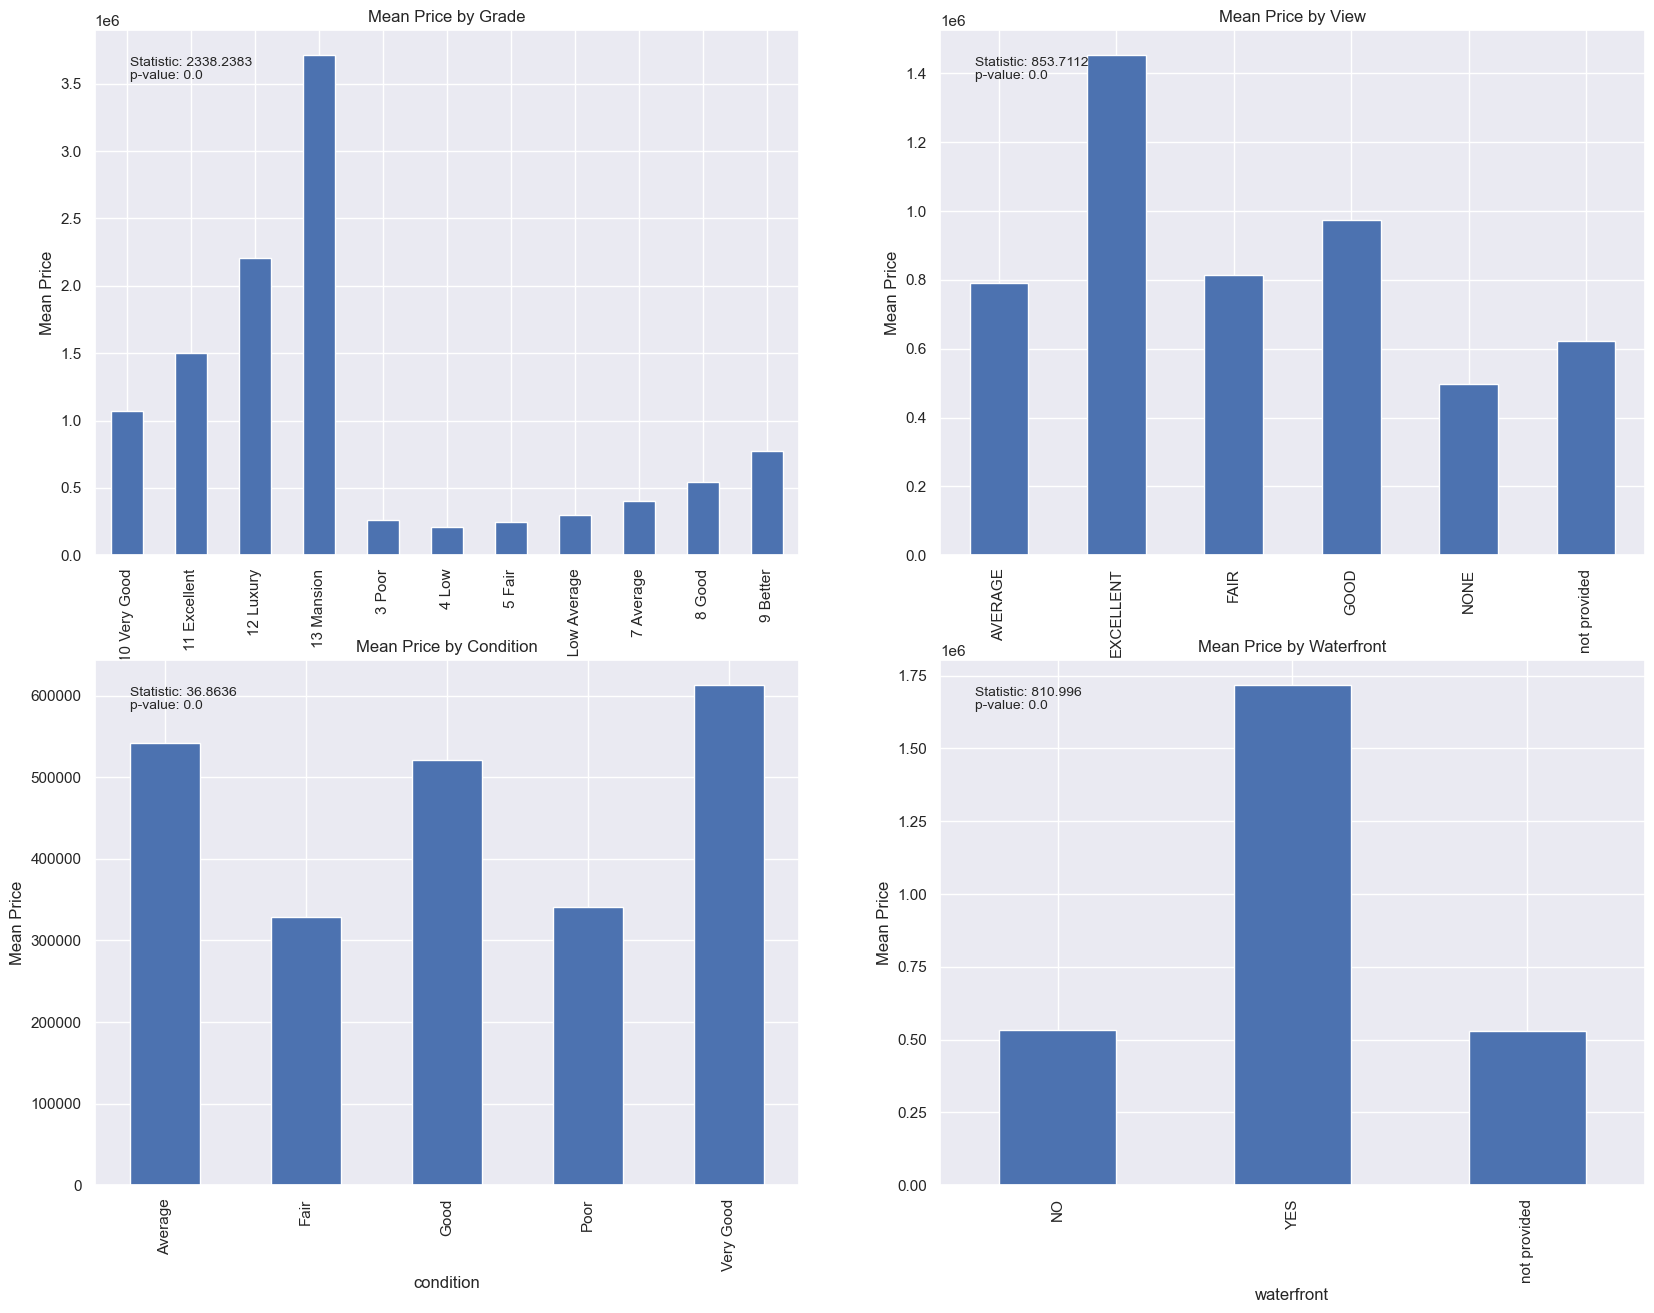

In [25]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))

axs = [item for sublist in axs for item in sublist]

for idx, _ in enumerate(cat_cols):
    visualize_mean_by_category(df, _, 'price', axs[idx])

# Data Processing
Objectives:
- Encode categorical features
    - we'll be using an ordinal encoder on three categorical features (grade, view, condition) because an ordered relationship exists in all of them
    - we'll use a one hot encoder for the waterfront feature because its values have no ordinal relationship


In [78]:
def encode_columns(dataframe, column_name, ordinal_order):
    # Create an instance of the OrdinalEncoder with the specified order
    encoder = OrdinalEncoder(categories=[ordinal_order])

    # Reshape the column values to a 2D array
    column_values = dataframe[column_name].values.reshape(-1, 1)

    # Encode the specified column
    encoded_col = encoder.fit_transform(column_values)

    # Update the dataframe with the encoded values
    dataframe[column_name] = encoded_col

    # Return the updated dataframe
    return dataframe

In [79]:
orders_dict = { # a dict to hold the ordinal order for all cat features
    "grade": ["3 Poor", "4 Low", "5 Fair", "6 Low Average", "7 Average", "8 Good", "9 Better", "10 Very Good",
              "11 Excellent", "12 Luxury", "13 Mansion"],
    "view": ["not provided", "NONE", "FAIR", "AVERAGE", "GOOD", "EXCELLENT"],
    "condition": ["Poor", "Fair", "Average", "Good", "Very Good"],
}

In [80]:
# create a df to hold encoded data
df_encoded = df.copy()

In [81]:
for column, order in orders_dict.items():
    df_encoded = encode_columns(df_encoded, column, order)
    print(f"{column} encoded")

grade encoded
view encoded
condition encoded


In [82]:
def one_hot_encode(dataframe, column_name):
    # Create an instance of the OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False)

    # Reshape the column values to a 2D array
    values = dataframe[column_name].values.reshape(-1, 1)

    # Perform one-hot encoding
    encoded = encoder.fit_transform(values)

    # Create column names for the one-hot encoded features
    categories = encoder.categories_[0]
    column_names = [f'{column_name}_{category}' for category in categories]

    # Create a new dataframe with the one-hot encoded features
    dataframe_encoded = pd.DataFrame(encoded, columns=column_names)

    # Concatenate the original dataframe with the one-hot encoded dataframe
    dataframe_encoded = pd.concat([dataframe, dataframe_encoded], axis=1)
    
    # Drop original column
    dataframe_encoded = dataframe_encoded.drop(column_name, axis=1)

    # Return the updated dataframe
    return dataframe_encoded

In [83]:
# apply one hot encoding to waterfront column
df_encoded = one_hot_encode(df_encoded, 'waterfront')

# save file
df_encoded.to_csv(path_or_buf='data/processed/encoded_data.csv', index=False)

# Modeling
We'll be creating a linear regression model.

Every model has makes its own assumtions about the data. The following are the assumtions made my a linear regression model:
- Linear relationship
- Multivariate normality
- No or little multicollinearity
- Homescedasticity

## Checking for multicollinearity
We'll first start by checking for multicollinearity to help in selcting which features to include in our model

In [35]:
data = pd.read_csv("data/processed/encoded_data.csv")

In [36]:
data['zipcode'].nunique()

70

In [37]:
data.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
view,1.0,1.0,1.0,1.0,1.0
condition,2.0,2.0,2.0,4.0,2.0


In [131]:
# secpeciy columns to exclude
exclude_cols = ['price', 'id', 'date', 'yr_renovated', 'yr_built', 'sqft_basement', 'lat', 'long', 'zipcode', 'bedrooms', 'sqft_above', 'bathrooms', 'waterfront_not provided', 'waterfront_NO', 'floors', 'sqft_living15', 'sqft_living']
# the independent variables set
X = data.iloc[:, ~np.isin(list(data.columns), exclude_cols)]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [vif(X.values, i)
                    for i in range(len(X.columns))]

print(vif_data)

          feature       VIF
0        sqft_lot  2.344629
1            view  4.423597
2       condition  7.373907
3           grade  8.926983
4      sqft_lot15  2.526415
5  waterfront_YES  1.167262


## Simple Linear Regression Model
We'll first start with a simple linear regression model. The feature of choice will be sqft_living due to its high positive correlation with the target variable (price)

For our models we'll be using R-squared as well as Mean Absolute Error(MAE) as metrics to evaluate our models by. MAE because unlike other metrics its not as sentive to ouliers
### Findings
- The coefficient of 280.863 indicates that for every unit increase in the independent variable, the dependent variable is expected to increase by approximately 280.863 units, assuming all other factors remain constant. The intercept of -43988.892 suggests that when the independent variable has a value of zero, the predicted value of the dependent variable is approximately -43988.892.

- The R-squared value of 0.492687 suggests that approximately 49.27% of the variance in the dependent variable can be explained by the independent variable included in the model. This indicates a moderate level of goodness of fit, suggesting that the model captures a significant portion of the relationship between the variables.

- Additionally, the mean absolute error (MAE) of $173824.88 calculates the average of the absolute differences between the predicted values and the actual values.. A higher MSE implies a greater level of prediction error, and in this case, the relatively large MSE suggests that there is some degree of variability that is not captured by the model.

- Overall, while the model demonstrates a statistically significant relationship between the independent and dependent variables, there is still room for improvement in explaining the remaining variance and reducing the prediction error.

- When ouliers are removed the R-squre value decreases to 0.316, which suggests that the model is worse that the model with ouliers. However the mae does decrese to $145964.07 which is still a lot, the model might be sliightly better, but can still be improved upon.







In [192]:
# select features
X = data['sqft_living']
# select target 
y =  data['price']

# Add a constant term to the input features
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

# Get the coefficients
coefficients = results.params
print("Coefficients:", coefficients)

# Get mean absolute error
y_pred = results.predict(X)
y_true = y
mae = mean_absolute_error(y_pred=y_pred, y_true=y_true)
print("Mean Squared Error: ", mae)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:46:11   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

### Dealing with outliers
We'll consider any value 1.5 standard deviations away from the mean as an outlier

We'll be removing ouliers from our models this is because outliers can have a negative impact on the accuracy and reliability of a linear regression model, as they can distort the slope and intercept of the best-fit line. 

In [194]:
# create a copy of the original data
model_data = data[['sqft_living', 'price']]

# Get mean and standard-deviation
mu = model_data['sqft_living'].mean()
sigma = model_data['sqft_living'].std()

# Compute the z-scores for each row in the 'sqft_living' column
model_data.loc[:, 'sqft_living_z_score'] = (model_data['sqft_living'] - mu) / sigma

# Select only the rows where the absolute value of the z-score is less than or equal to 3
filtered_model_data = model_data[np.abs(model_data['sqft_living_z_score']) <= 1.5]

# Drop the 'sqft_living_z_score' column 
filtered_model_data = filtered_model_data.drop('sqft_living_z_score', axis=1)

# select features
X = filtered_model_data['sqft_living']
# select target 
y =  filtered_model_data['price']

# Add a constant term to the input features
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

# Get the coefficients
coefficients = results.params
print("Coefficients:", coefficients)

# Get mean absolute error
y_pred = results.predict(X)
y_true = y
mae = mean_absolute_error(y_pred=y_pred, y_true=y_true)
print("Mean Squared Error: ", mae)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     9135.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:46:45   Log-Likelihood:            -2.6959e+05
No. Observations:               19784   AIC:                         5.392e+05
Df Residuals:                   19782   BIC:                         5.392e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.677e+04   4393.421     19.749      

C:\Users\Admin\AppData\Local\Temp\ipykernel_11196\3749632569.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.loc[:, 'sqft_living_z_score'] = (model_data['sqft_living'] - mu) / sigma


## Multiple Linear Regression Model
We'll now add on more feature to see if we can better predict the price

The features that we'll be adding to our model are condition and grade. House condition reflects the quality and maintenance of the house, which influences its value and attractiveness to buyers. Grade represents the construction and design, which also affects its desirability and demand. Both variables have a positive correlation with the house price, as shown by the bar plots. There are also the better balanced categorical features in our dataset. Therefore, we include them in our model to explain the variation in the house price.
 

In [195]:
# list of features
features = ['sqft_living', 'condition', 'grade']
# select features
X = data[features]
# select target 
y =  data['price']

# Add a constant term to the input features
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

# Get the coefficients
coefficients = results.params
print("Coefficients:\n", coefficients)

# Get mean absolute error
y_pred = results.predict(X)
y_true = y
mae = mean_absolute_error(y_pred=y_pred, y_true=y_true)
print("Mean Squared Error: ", mae)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     8696.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:46:53   Log-Likelihood:            -2.9884e+05
No. Observations:               21597   AIC:                         5.977e+05
Df Residuals:                   21593   BIC:                         5.977e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.873e+05   1.04e+04    -47.030      

### multiple linear regression model but with ouliers in the sqft_living removed

In [196]:
# create a copy of the original data
model_data = data[['sqft_living', 'condition', 'grade', 'price']]

# Get mean and standard-deviation
mu = model_data['sqft_living'].mean()
sigma = model_data['sqft_living'].std()

# Compute the z-scores for each row in the 'sqft_living' column
model_data.loc[:, 'sqft_living_z_score'] = (model_data['sqft_living'] - mu) / sigma

# Select only the rows where the absolute value of the z-score is less than or equal to 3
filtered_model_data = model_data[np.abs(model_data['sqft_living_z_score']) <= 1.5]

# Drop the 'sqft_living_z_score' column 
filtered_model_data = filtered_model_data.drop('sqft_living_z_score', axis=1)

# select features
X = filtered_model_data[features]
# select target 
y =  filtered_model_data['price']


# Add a constant term to the features
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

# Get the coefficients
coefficients = results.params
print("Coefficients:\n", coefficients)

# Get mean absolute error
y_pred = results.predict(X)
y_true = y
mae = mean_absolute_error(y_pred=y_pred, y_true=y_true)
print("Mean Squared Error: ", mae)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     4817.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:47:00   Log-Likelihood:            -2.6792e+05
No. Observations:               19784   AIC:                         5.358e+05
Df Residuals:                   19780   BIC:                         5.359e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.26e+05   8516.214    -38.285      

C:\Users\Admin\AppData\Local\Temp\ipykernel_11196\3237884997.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.loc[:, 'sqft_living_z_score'] = (model_data['sqft_living'] - mu) / sigma


# Regression Results
In the linear regression modeling part, four models were built to predict house prices based on different attributes of the house.

The first model, a simple linear regression, achieved an R-squared value of 0.493, indicating that 49.3% of the variance in house prices can be explained by the square footage of the living area. The model's coefficients suggest that for every square foot increase in living area, the house price is estimated to increase by $280.86. However, the model's performance can be improved as indicated by the relatively high mean absolute error of $173824.88.

The second model, a simple linear regression with outliers removed, shows a lower R-squared value of 0.316, suggesting that the removal of outliers reduced the model's explanatory power. The coefficients indicate that for every square foot increase in living area, the house price is estimated to increase by $207.48. The mean absolute error improved to $145964.07, indicating better accuracy compared to the first model.

The third model, a multiple linear regression, incorporated additional attributes such as condition and grade. It achieved an R-squared value of 0.547, indicating that 54.7% of the variance in house prices can be explained by the combined effect of square footage, condition, and grade. The coefficients suggest that the condition and grade of a house have significant impacts on its price. However, the model's mean absolute error is relatively high at $161654.60.

The fourth model, a multiple linear regression with outliers in square footage removed, shows an improved R-squared value of 0.422 compared to the third model, after removing outliers. The coefficients indicate that the condition and grade still have significant impacts on house prices. The mean absolute error decreased to $132474.56, indicating better accuracy compared to both the third model and the first two models.

Considering the model metrics, the fourth model, the multiple linear regression with outliers in square footage removed, appears to be the best model for predicting house prices. It achieved a reasonably high R-squared value, indicating a good level of explanation for the variance in house prices, while also exhibiting a lower mean absolute error compared to the other models.